In [1]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import skimage
import skimage.color
import skimage.io
import skimage.feature
import skimage.transform

In [3]:
skimage.__version__

'0.18.1'

In [4]:
# load the data
data = pickle.load(open('data_animals_head_20.pickle','rb'))

In [5]:
data['description']

'There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)'

In [6]:
# split the data into independent and dependent
X = data['data'] # independent
y = data['target'] # dependent

In [7]:
print(X)

[[[[196 214 188]
   [196 214 188]
   [196 214 188]
   ...
   [ 81  76  80]
   [ 81  76  80]
   [ 69  64  68]]

  [[196 214 188]
   [196 214 188]
   [196 215 187]
   ...
   [ 82  77  81]
   [ 83  78  82]
   [ 77  72  76]]

  [[193 213 185]
   [194 214 186]
   [194 214 186]
   ...
   [ 82  77  81]
   [ 81  76  80]
   [ 78  73  77]]

  ...

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 70  65  69]
   [ 65  60  64]
   [ 62  57  63]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 66  61  65]
   [ 62  57  61]
   [ 64  59  65]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 56  51  55]
   [ 79  74  78]
   [ 70  63  70]]]


 [[[  4   2   3]
   [  7   5   6]
   [  6   5   3]
   ...
   [ 42  31  25]
   [ 46  35  29]
   [ 45  32  26]]

  [[  7   5   6]
   [  5   4   2]
   [  2   1   0]
   ...
   [ 22  11   5]
   [ 43  32  26]
   [ 47  36  30]]

  [[  6   5   3]
   [  3   2   0]
   [  2   1   0]
   ...
   [ 33  24  17]
   [ 48  39  32]
   [ 54  45

In [8]:
print(y)

['bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'c

In [9]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [10]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((1618, 80, 80, 3), (405, 80, 80, 3), 1618, 405)

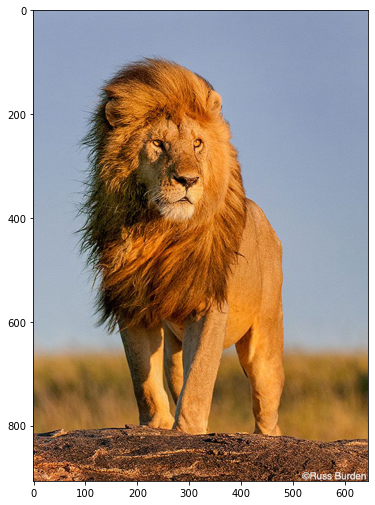

In [11]:
# Feature Extraction

img = skimage.io.imread('./images/lion.jpg')
plt.figure(figsize=(6,10))
plt.imshow(img)

In [12]:
# hog transoform
img_re = skimage.transform.rescale(img,1/3).reshape((302,215))
gray = skimage.color.rgb2gray(img_re)
feature_vector, hog_img = skimage.feature.hog(gray,orientations=9,
                    pixels_per_cell=(14,14),
                    cells_per_block=(2,2),
                    visualize=True)

<ipython-input-12-8f72c630b99d>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray = skimage.color.rgb2gray(img_re)


In [13]:
len(feature_vector)

10080

In [14]:
gray.shape

(302, 215)

In [15]:
302*215

64930

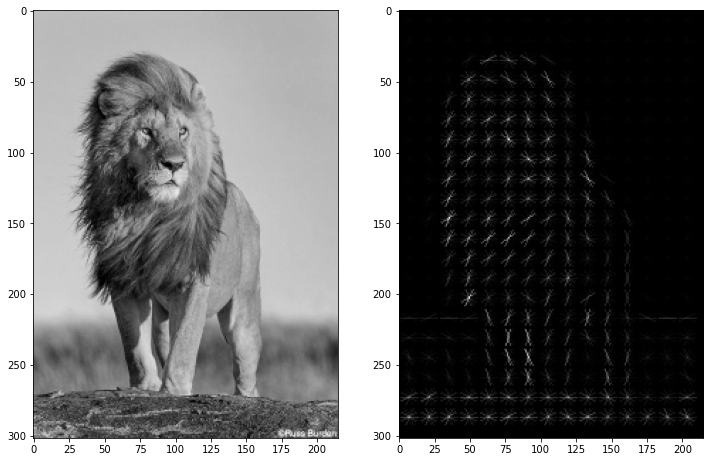

In [16]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hog_img,cmap='gray')

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

In [18]:
from skimage.color import rgb2gray

In [19]:
class rgb2gray_transform(BaseEstimator,TransformerMixin):
    import skimage.color
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])

In [20]:
x_train.shape

(1618, 80, 80, 3)

In [21]:
rgb2grayobj = rgb2gray_transform()
x_train_gray = rgb2grayobj.fit_transform(x_train)

In [22]:
x_train_gray.shape

(1618, 80, 80)

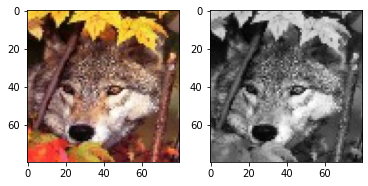

In [23]:
plt.subplot(1,2,1)
plt.imshow(x_train[12])
plt.subplot(1,2,2)
plt.imshow(x_train_gray[12],cmap='gray')

In [24]:
class hogtransformer(BaseEstimator,TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8, 8),cells_per_block=(3, 3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features= skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                                cells_per_block=self.cells_per_block)
            
            return hog_features
        
        hfeatures = np.array([local_hog(x) for x in X])
        return hfeatures

In [25]:
hogt = hogtransformer()

In [26]:
x_train_hog = hogt.fit_transform(x_train_gray)

In [27]:
x_train_hog.shape

(1618, 5184)

In [28]:
#  Training Machine Learning Model

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [29]:
model_sgd = SGDClassifier(loss='hinge',learning_rate='adaptive',
                          early_stopping=True,eta0=0.1,)

In [30]:
x_train.shape,x_test.shape

((1618, 80, 80, 3), (405, 80, 80, 3))

In [31]:
grayify = rgb2gray_transform()
hogify = hogtransformer()
scalify = StandardScaler()

In [32]:
# pipeline
# step-1: convert into grayscale
x_train_gray = grayify.fit_transform(x_train)
# step-2: extract the features
x_train_hog = hogify.fit_transform(x_train_gray)
# step-3: Normalization
x_train_scale = scalify.fit_transform(x_train_hog)
# step-4: machine learning
model_sgd.fit(x_train_scale,y_train)

SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive')

In [33]:
x_test_gray = grayify.fit_transform(x_test)
# step-2: extract the features
x_test_hog = hogify.fit_transform(x_test_gray)
# step-3: Normalization
x_test_scale = scalify.transform(x_test_hog)

y_pred_test = model_sgd.predict(x_test_scale)

In [34]:
y_pred_test

array(['sheep', 'wolf', 'panda', 'lion', 'dog', 'lion', 'dog', 'elephant',
       'duck', 'rabbit', 'deer', 'lion', 'cow', 'lion', 'pigeon',
       'rabbit', 'mouse', 'monkey', 'elephant', 'chicken', 'tiger', 'dog',
       'mouse', 'cat', 'human', 'human', 'lion', 'panda', 'elephant',
       'dog', 'sheep', 'mouse', 'wolf', 'dog', 'human', 'sheep', 'dog',
       'cat', 'tiger', 'cat', 'duck', 'bear', 'human', 'pigeon', 'dog',
       'panda', 'bear', 'chicken', 'chicken', 'sheep', 'bear', 'deer',
       'duck', 'cow', 'panda', 'sheep', 'human', 'elephant', 'bear',
       'chicken', 'elephant', 'panda', 'rabbit', 'chicken', 'deer',
       'rabbit', 'panda', 'monkey', 'tiger', 'deer', 'panda', 'deer',
       'mouse', 'eagle', 'cat', 'sheep', 'dog', 'rabbit', 'duck',
       'pigeon', 'cat', 'duck', 'tiger', 'wolf', 'human', 'rabbit',
       'lion', 'pigeon', 'elephant', 'panda', 'human', 'human', 'cow',
       'lion', 'bear', 'wolf', 'panda', 'deer', 'elephant', 'eagle',
       'elephant',

In [48]:
#  Model Evaluation
cr = sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
bear,0.529412,0.450000,0.486486,20.000000
cat,0.589744,0.718750,0.647887,32.000000
chicken,0.722222,0.650000,0.684211,20.000000
cow,0.277778,0.250000,0.263158,20.000000
deer,0.625000,0.500000,0.555556,20.000000
dog,0.354839,0.407407,0.379310,27.000000
duck,0.576923,0.750000,0.652174,20.000000
eagle,0.600000,0.473684,0.529412,19.000000
elephant,0.608696,0.700000,0.651163,20.000000
human,0.531250,0.850000,0.653846,20.000000


In [49]:
metrics.cohen_kappa_score(y_test,y_pred_test)

0.4987591452605795

In [68]:
# pipeline model

from sklearn.pipeline import Pipeline
from sklearn import preprocessing


le = preprocessing.LabelEncoder()

In [69]:
model_pipeline = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hogtransformer(orientations=8,pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',eta0=0.001))
])


In [77]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('grascale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(orientations=8, pixels_per_cell=(10, 10))),
                ('scale', StandardScaler()),
                ('sgd', SGDClassifier(eta0=0.001, learning_rate='adaptive'))])

In [78]:
y_pred_test = model_pipeline.predict(x_test)

In [79]:
y_pred_test

array(['bear', 'wolf', 'panda', 'cat', 'pigeon', 'wolf', 'monkey',
       'elephant', 'mouse', 'rabbit', 'deer', 'wolf', 'cat', 'lion',
       'pigeon', 'monkey', 'bear', 'monkey', 'cow', 'cow', 'tiger',
       'mouse', 'cat', 'chicken', 'human', 'lion', 'elephant', 'panda',
       'elephant', 'pigeon', 'deer', 'sheep', 'lion', 'monkey', 'monkey',
       'sheep', 'wolf', 'chicken', 'tiger', 'cat', 'wolf', 'sheep',
       'monkey', 'pigeon', 'rabbit', 'panda', 'bear', 'cat', 'wolf',
       'bear', 'lion', 'deer', 'duck', 'bear', 'panda', 'sheep', 'human',
       'tiger', 'bear', 'chicken', 'elephant', 'monkey', 'rabbit', 'cow',
       'rabbit', 'eagle', 'deer', 'monkey', 'tiger', 'dog', 'panda',
       'deer', 'mouse', 'sheep', 'lion', 'dog', 'dog', 'mouse', 'sheep',
       'sheep', 'cat', 'duck', 'tiger', 'wolf', 'human', 'rabbit',
       'elephant', 'rabbit', 'cat', 'sheep', 'pigeon', 'human', 'cow',
       'deer', 'tiger', 'wolf', 'panda', 'deer', 'eagle', 'eagle',
       'elephant',

In [82]:
cr = sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
bear,0.578947,0.550000,0.564103,20.000000
cat,0.609756,0.781250,0.684932,32.000000
chicken,0.500000,0.450000,0.473684,20.000000
cow,0.466667,0.350000,0.400000,20.000000
deer,0.777778,0.700000,0.736842,20.000000
dog,0.550000,0.407407,0.468085,27.000000
duck,0.866667,0.650000,0.742857,20.000000
eagle,0.550000,0.578947,0.564103,19.000000
elephant,0.736842,0.700000,0.717949,20.000000
human,0.888889,0.800000,0.842105,20.000000
